# Housing Price Prediction

# Introduction

In this project, I was data taken from kaggal and I will demonstrate a step-by-step approach to building a housing price prediction model using machine learning techniques. I will explain each step, provide code snippets, and discuss the rationale behind my decisions.

# Project Overview

The goal of this project is to create a model that predicts housing prices based on various features like area, number of bedrooms, bathrooms, and more. Accurate price predictions are crucial for buyers, sellers, and real estate professionals.

# Step 1: Data Collection and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"Housing.csv", encoding="unicode_ escape")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.shape

(545, 13)

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
data["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [10]:
data["area"].unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [11]:
data["bedrooms"].unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [12]:
data["bathrooms"].unique()

array([2, 4, 1, 3], dtype=int64)

In [13]:
data["stories"].unique()

array([3, 4, 2, 1], dtype=int64)

In [14]:
data["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [15]:
data["guestroom"].unique()

array(['no', 'yes'], dtype=object)

In [16]:
data["basement"].unique()

array(['no', 'yes'], dtype=object)

In [17]:
data["parking"].unique()

array([2, 3, 0, 1], dtype=int64)

In [18]:
data["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

# Step 2: Data Preprocessing

In these step I will try find and removing duplicates ensures data integrity.
also trying to find Null values and handling them it is important for model accuracy.

In [19]:
data.duplicated().sum()

0

In [20]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Step 3: Data Visualization and Analysis

Data visualization helps us understand relationships between variables.
Understanding data distribution and correlations is crucial for feature selection.

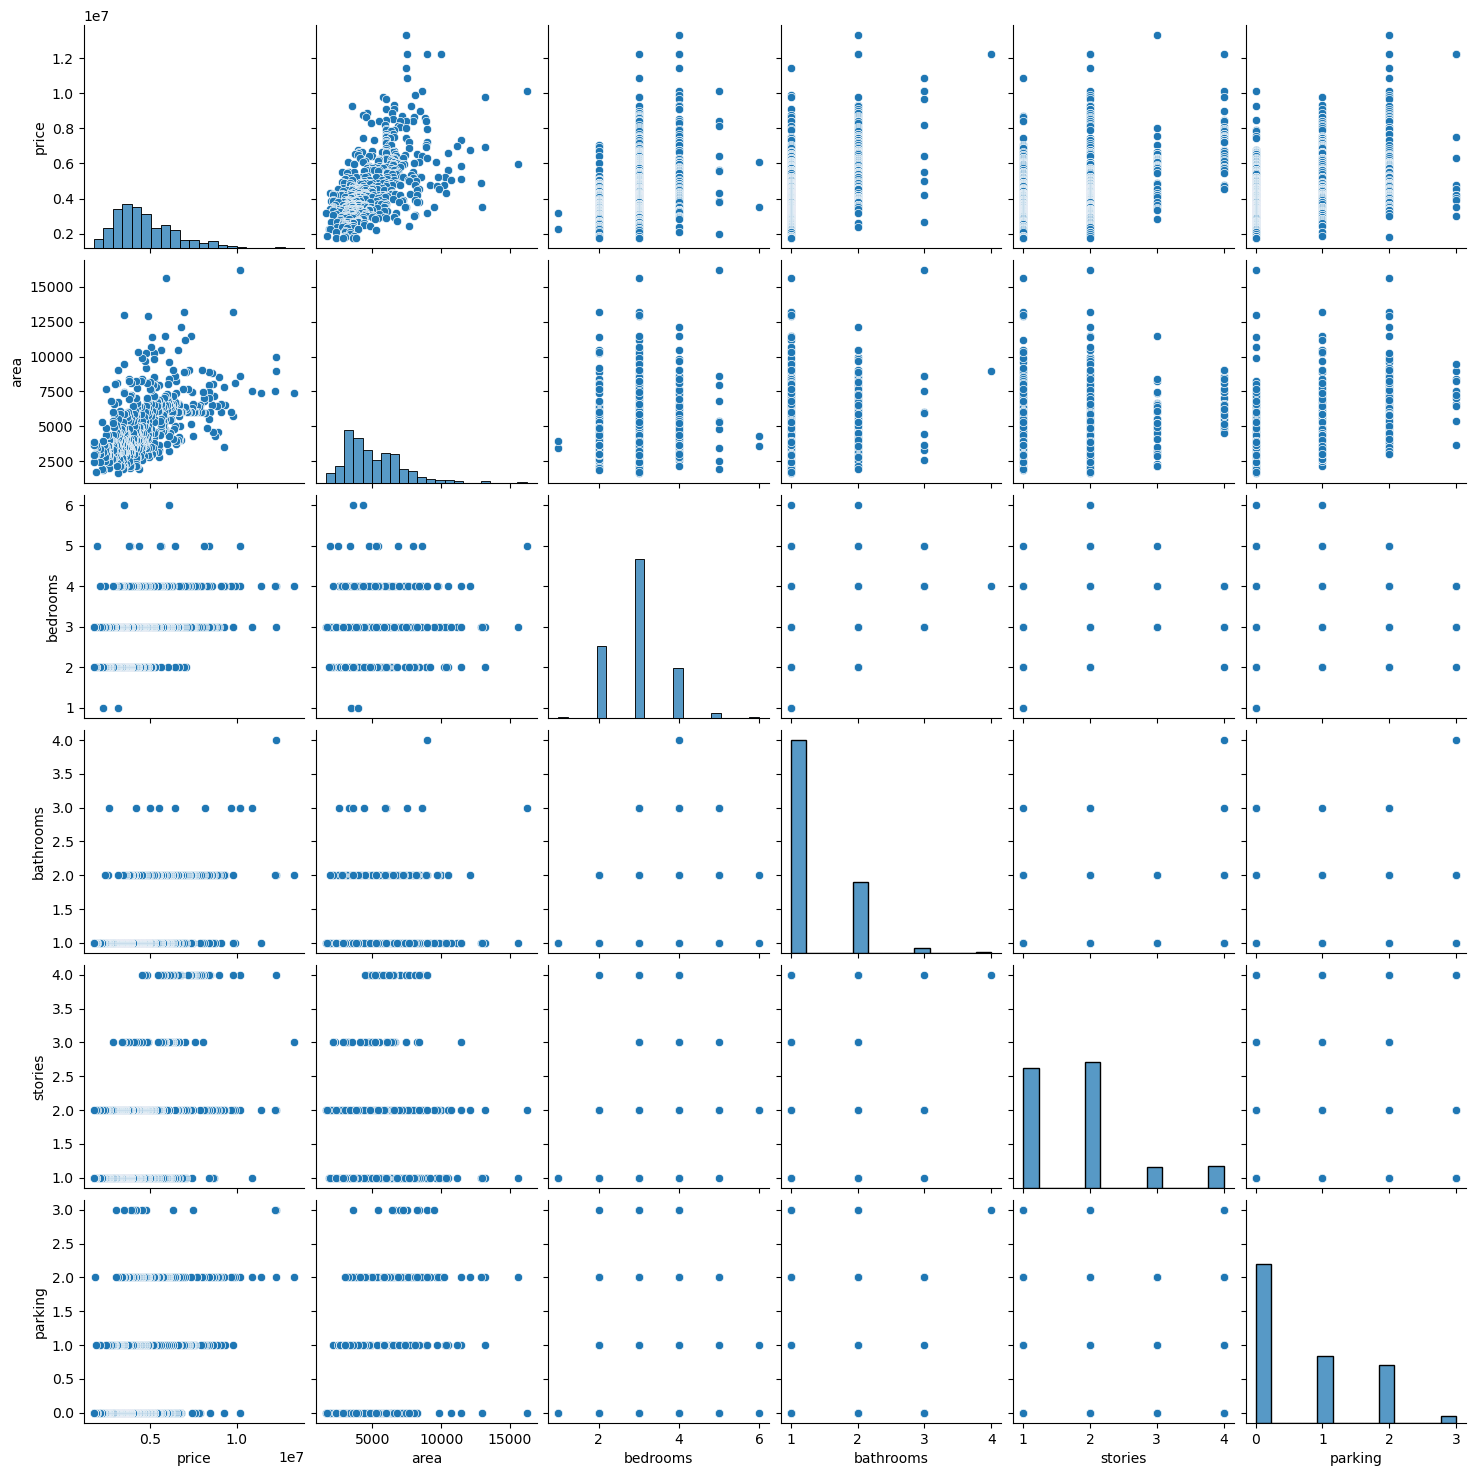

In [21]:
sns.pairplot(data)
plt.show()

In [22]:
data_s=data.corr()

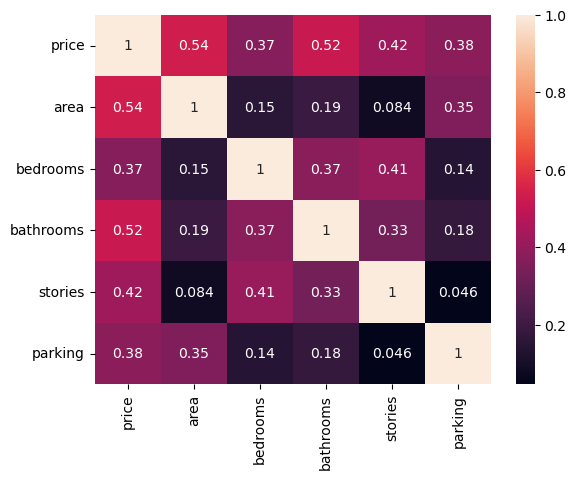

In [23]:
sns.heatmap(data_s, annot=True)
plt.show()

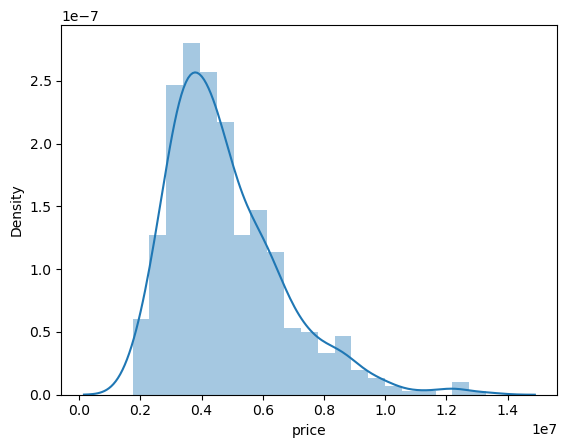

In [24]:
sns.distplot(data["price"])
plt.show()

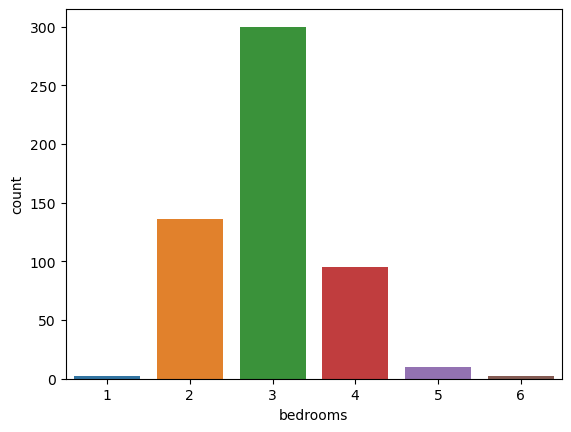

In [25]:
sns.countplot(data['bedrooms'])
plt.show()

# Step-4 : Encoding

AI or ML alogorithms or our models can't understand categorical values for that we need to convert categorical values to numerical values.
Encoding categorical variables is necessary for numerical modeling.

In [26]:
cat_data=data.select_dtypes(include=["object"]).columns

for column in cat_data:
    un_values=data[column].unique()
    print(f"Unique Values for {column}:{un_values}")

Unique Values for mainroad:['yes' 'no']
Unique Values for guestroom:['no' 'yes']
Unique Values for basement:['no' 'yes']
Unique Values for hotwaterheating:['no' 'yes']
Unique Values for airconditioning:['yes' 'no']
Unique Values for prefarea:['yes' 'no']
Unique Values for furnishingstatus:['furnished' 'semi-furnished' 'unfurnished']


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["furnishingstatus"]=le.fit_transform(data["furnishingstatus"])
data["mainroad"]=le.fit_transform(data["mainroad"])
data["guestroom"]=le.fit_transform(data["guestroom"])
data["basement"]=le.fit_transform(data["basement"])
data["hotwaterheating"]=le.fit_transform(data["hotwaterheating"])
data["airconditioning"]=le.fit_transform(data["airconditioning"])
data["prefarea"]=le.fit_transform(data["prefarea"])

In [28]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [29]:
data.shape

(545, 13)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


# Step 5: Outlier Detection

Inthese step I was try to find outliers and handling them.
Utilized box plots and the IQR method to detect and handle outliers in the 'price' and 'area' columns
Outliers can significantly affect model performance, so they need to be addressed.

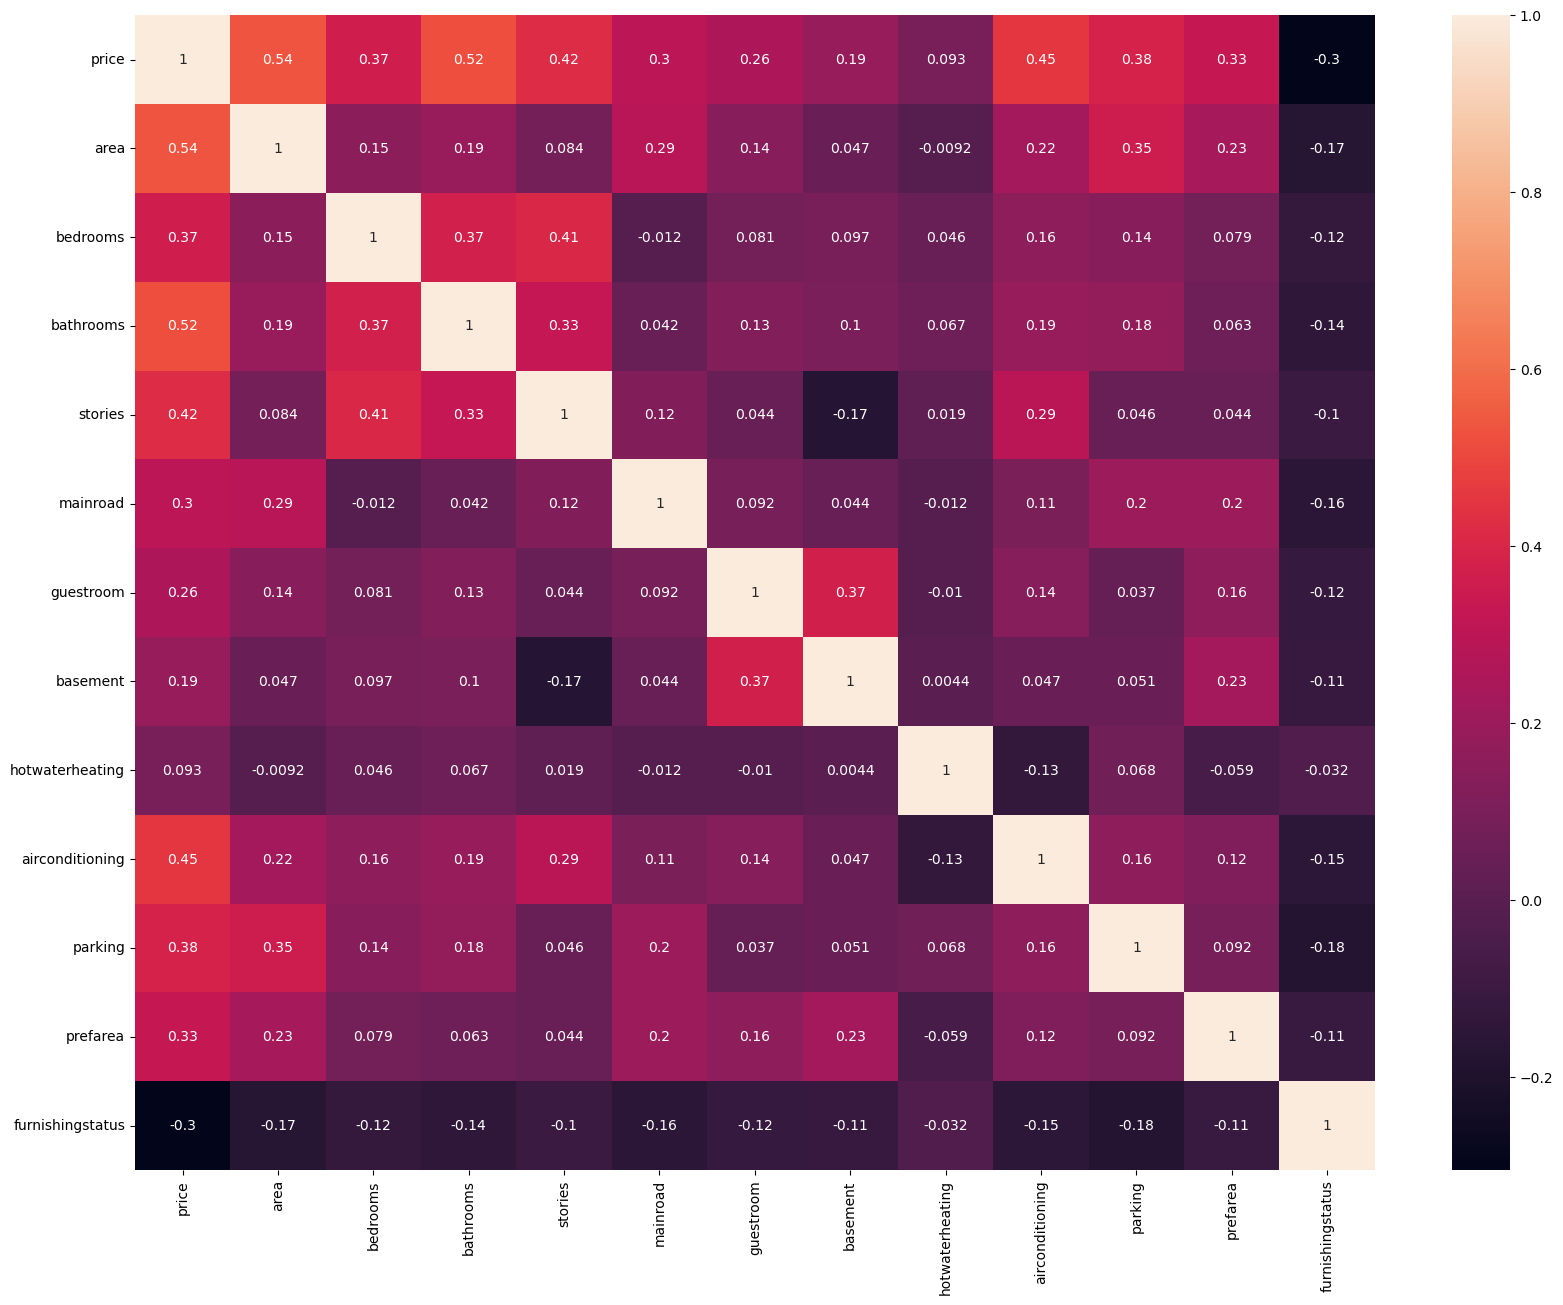

In [31]:
data_s=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(data_s, annot=True)
plt.show()

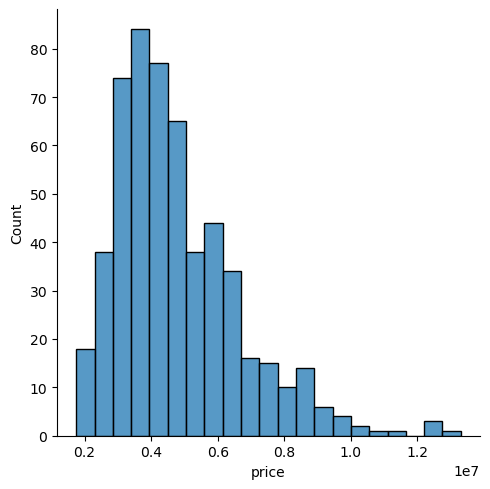

In [32]:
sns.displot(data['price'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


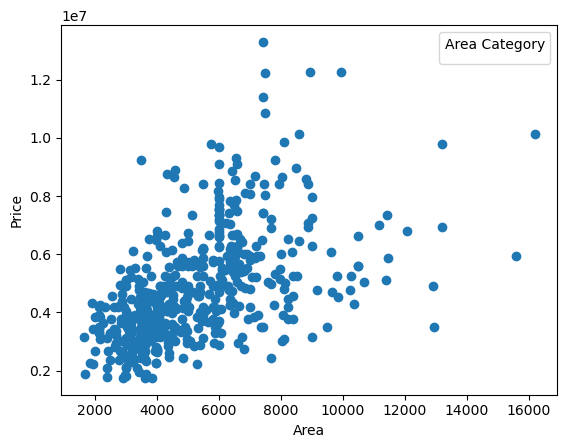

In [33]:
plt.scatter(data["area"], data["price"])

# Customize the plot
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Area Category')

# Show the plot
plt.show()


In [34]:
data1=data.copy()

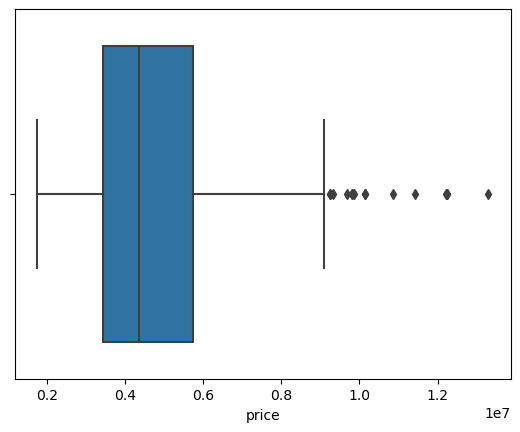

In [35]:
# Create box plots for numerical features
sns.boxplot(x=data1['price'])
plt.show()


In [36]:
# Calculate the 5th and 95th percentiles
q5 = data["price"].quantile(0.05)
q95 = data["price"].quantile(0.95)

# Filter out values outside the percentile range
data1 = data[(data["price"] >= q5) & (data["price"] <= q95)]

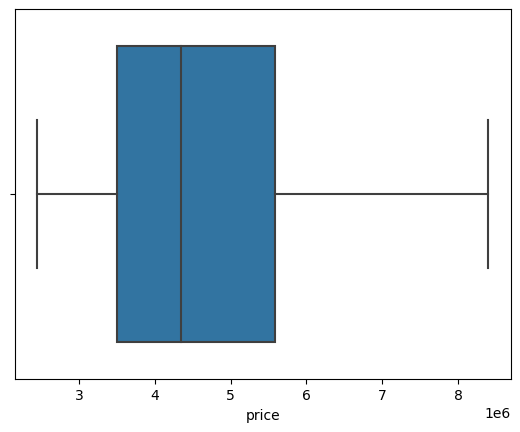

In [37]:
# Create box plots for numerical features
sns.boxplot(x=data1['price'])
plt.show()

In [38]:
data1.shape

(494, 13)

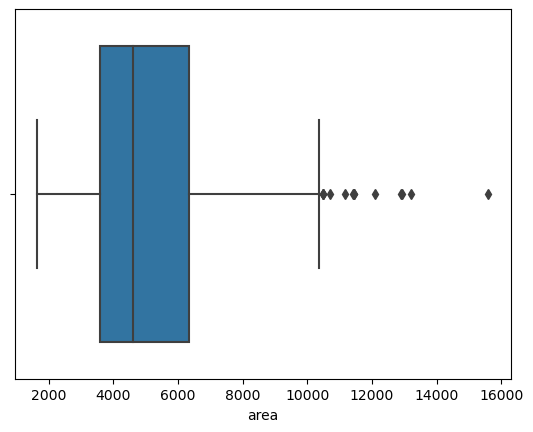

In [39]:
sns.boxplot(x=data1['area'])
plt.show()

In [40]:
# Calculate the 5th and 95th percentiles
q5 = data["area"].quantile(0.05)
q95 = data["area"].quantile(0.95)

# Filter out values outside the percentile range
data1 = data[(data["area"] >= q5) & (data["area"] <= q95)]

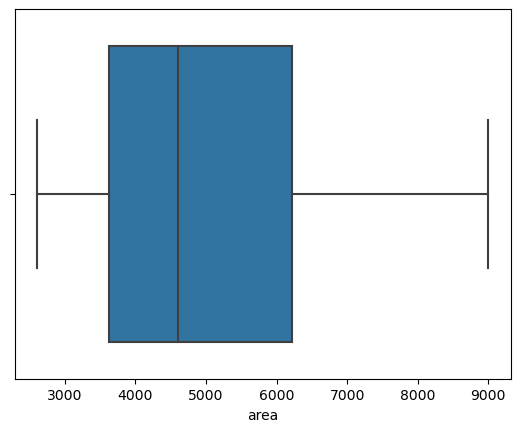

In [41]:
sns.boxplot(x=data1['area'])
plt.show()

In [42]:
data1.shape

(492, 13)

In [43]:
data1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,2
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [44]:
data2=data1.copy()

# Step 6: Data Splitting and Scaling

Splitting data allows us to train and test the model.
Feature scaling ensures that all variables have the same scale for modeling.

In [45]:
from sklearn.model_selection import train_test_split
X=data2.drop(["price"], axis=1)
y=data2["price"]

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaler=ss.fit_transform(X)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y, test_size=0.2, random_state=7)

In [48]:
X_train.shape

(393, 12)

In [49]:
X_test.shape

(99, 12)

# Step 7: Model Selection and Training

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [51]:
y_pred=lr_model.predict(X_test)
y_pred

array([4084034.58450099, 7468828.1270079 , 4166178.83362697,
       5847278.71909358, 6428994.47700715, 4852987.59366144,
       2280800.22177786, 3254034.82305411, 7433778.59404819,
       4258940.20471688, 4537999.90866966, 6062817.56742963,
       3848862.71534219, 4662065.64072118, 2153629.17024138,
       3559626.4413497 , 4545176.9310101 , 7856448.15808791,
       4250931.9676081 , 5287979.43858263, 2740311.57588242,
       3859882.59125243, 2853281.71974305, 3359325.42527946,
       4373870.99605481, 3388093.93346549, 6481359.91183078,
       4688807.21033504, 6701330.71675512, 5205089.60772504,
       4908676.60261221, 2842522.65842299, 2748111.89533947,
       5088397.98535034, 5834415.84595021, 7015132.9878183 ,
       2787718.99602851, 3422336.62783623, 4784038.94890369,
       3496503.45711022, 5086248.36667821, 3840762.12272939,
       5015245.83611295, 2842522.65842299, 5355269.72823322,
       4372803.96436148, 4376897.01128789, 6143669.21765817,
       2812882.01230889,

In [52]:
lr_model.score(X_test,y_test)

0.7019692758360193

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.70196928, 0.60575256, 0.63983643, 0.6826576 , 0.76048246])

# Step 8: Comparing Model with Others

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

models=[("LinearRegression",LinearRegression()),("LogisticRegression",LogisticRegression()),("DecisionTreeRegressor",DecisionTreeRegressor(random_state=42)),
        ("RandomForestRegressor",RandomForestRegressor(random_state=42)),("Ridge",Ridge()),("Lasso",Lasso()),("KNeighborsClassifier",KNeighborsClassifier()),
        ("GradientBoostingRegressor",GradientBoostingRegressor()),("SVR",SVR())]

for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(f'Model: {name}')
    print(f'R-squared (R2): {r2}\n')
    

Model: LinearRegression
R-squared (R2): 0.7019692758360193

Model: LogisticRegression
R-squared (R2): 0.2113422203799341

Model: DecisionTreeRegressor
R-squared (R2): 0.12894495219130686

Model: RandomForestRegressor
R-squared (R2): 0.6755862618461234

Model: Ridge
R-squared (R2): 0.7019701967575149

Model: Lasso
R-squared (R2): 0.7019691655541447

Model: KNeighborsClassifier
R-squared (R2): 0.22575663385869416

Model: GradientBoostingRegressor
R-squared (R2): 0.6820827875225294

Model: SVR
R-squared (R2): -0.0001589700065998123



# Step 9: Model Saving

As we find in above step we get LinearRegression with 70% accuracy so we use these alorithm for our model
Train the selected model on the entire dataset.
Save the trained model using joblib for future use.

In [55]:
import joblib
joblib.dump(lr_model,"Predicting_Housing_Price.pkl")

['Predicting_Housing_Price.pkl']

# Step 10: User Input and Prediction (Optional)

Defined a function to get user inputs for various features related to a house.
Encoded binary inputs and created a user DataFrame.
Utilized the pre-trained Linear Regression model to predict the housing price based on user inputs.
Displayed the predicted price to the user.

In [56]:
import joblib

model = joblib.load("Predicting_Housing_Price.pkl")

def get_user_inputs():
    print("Please provide the following information:")
    print("Print if your answer yes then 1 else 0")
    print("Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2")
    area = float(input("Area in square feet: "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = int(input("Main road access (yes=1/no=0): "))
    guestroom = int(input("Guest room available (yes=1/no=0): "))
    basement = int(input("Basement available (yes=1/no=0): "))
    hotwaterheating = int(input("Hot water heating (yes=1/no=0): "))
    airconditioning = int(input("Air conditioning (yes=1/no=0): "))
    parking = int(input("Number of parking spaces: "))
    prefarea = int(input("Preferred area yes=1/no=0): "))
    furnishingstatus =int(input("Furnishing status: "))
    
 
    '''mainroad = 1 if mainroad == "yes" else 0
    guestroom = 1 if guestroom == "yes" else 0
    basement = 1 if basement == "yes" else 0
    hotwaterheating = 1 if hotwaterheating == "yes" else 0
    airconditioning = 1 if airconditioning == "yes" else 0
    prefarea = 1 if prefarea == "yes" else 0'''
    
    
    user_inputs = {
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "parking":parking,
        "prefarea": prefarea,
        "furnishingstatus":furnishingstatus
    }
    
    return user_inputs


user_inputs = get_user_inputs()

user_df = pd.DataFrame([user_inputs])

predicted_price = model.predict(user_df)

print(f"Predicted Housing Price: ${predicted_price[0]:,.2f}")


Please provide the following information:
Print if your answer yes then 1 else 0
Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2
Area in square feet: 4250
Number of bedrooms: 3
Number of bathrooms: 1
Number of stories: 0
Main road access (yes=1/no=0): 1
Guest room available (yes=1/no=0): 1
Basement available (yes=1/no=0): 1
Hot water heating (yes=1/no=0): 0
Air conditioning (yes=1/no=0): 0
Number of parking spaces: 0
Preferred area yes=1/no=0): 1
Furnishing status: 2
Predicted Housing Price: $1,848,903,262.51


# Conclusion

In this project portfolio, I've demonstrated the entire process of building a housing price prediction model. I've covered data collection, preprocessing, visualization, outlier handling, feature scaling, model building, evaluation, and optional deployment. Accurate housing price predictions can be valuable for various stakeholders in the real estate industry.